In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15


import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from joblib import Parallel, delayed

Autosaving every 15 seconds


In [2]:
def place(img, pos):
    shape = img.shape
    m = pos.shape[0]
    p = 512 // m
    if len(shape) == 2:
        mosaic = np.zeros((m, m, p, p), dtype=np.uint16)
    else:
        mosaic = np.zeros((m, m, p, p, 3), dtype=np.uint8)
    for i in range(m):
        for j in range(m):
            x = pos[i][j][0]
            y = pos[i][j][1]
            mosaic[i][j] = img[p * x: p * x + p, p * y: p * y + p]
    return np.hstack(np.hstack(mosaic)).reshape(shape)
#image = skimage.io.imread('C:\\Users\\agano\\Documents\\notebooks\\huawei\\data_train\\64-sources\\1200.png')
#pos = np.zeros((16, 16, 2), dtype=np.uint16)
#for i in range(pos.shape[0]):
#    for j in range(pos.shape[1]):
#        pos[i][j][0] = i
#        pos[i][j][1] = j
def swap(img, x1, y1, x2, y2):
    t = pos[x1][y1].copy()
    pos[x1][y1] = pos[x2][y2].copy()
    pos[x2][y2] = t
#swap(pos, 3, 0, 3, 10)
#image1 = place(image, pos)
#plt.imshow(image1)

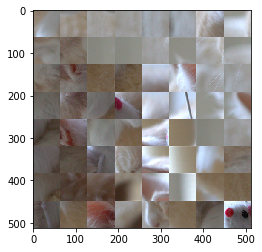

In [15]:
def solution(ud, lr, m, i0=0, j0=0):
    pos = np.zeros((m, m, 2), dtype=np.uint16)
    inf = np.uint32(1073741823)
    ud = ud.copy()
    lr = lr.copy()
    res = 0.0
    for i in range(0, m):
        for j in range(0, m):
            ud[i][j][i][j] = inf
            lr[i][j][i][j] = inf
    for i in range(0, m):
        for j in range(0, m):
            mn = inf
            mni = i
            mnj = j
            if i == 0 and j == 0:
                mni = i0
                mnj = j0
                mn = 0
            elif i == 0:
                li = pos[i][j - 1][0]
                lj = pos[i][j - 1][1]
                #print(li, lj)
                for i1 in range(0, m):
                    for j1 in range(0, m):
                        f = ud[li][lj][i1][j1]
                        #print(i1, j1, f, mn)
                        if mn > f:
                            mn = f
                            mni = i1
                            mnj = j1
            elif j == 0:
                ui = pos[i - 1][j][0]
                uj = pos[i - 1][j][1]
                for i1 in range(0, m):
                    for j1 in range(0, m):
                        f = lr[ui][uj][i1][j1]
                        if mn > f:
                            mn = f
                            mni = i1
                            mnj = j1
            else:
                li = pos[i][j - 1][0]
                lj = pos[i][j - 1][1]
                ui = pos[i - 1][j][0]
                uj = pos[i - 1][j][1]
                for i1 in range(0, m):
                    for j1 in range(0, m):
                        f = np.uint32(lr[li][lj][i1][j1]) + np.uint32(ud[ui][uj][i1][j1])
                        #print(mn, f)
                        if mn > f:
                            mn = f
                            mni = i1
                            mnj = j1
            
            for i1 in range(0, m):
                for j1 in range(0, m):
                    lr[i1][j1][mni][mnj] = inf
                    ud[i1][j1][mni][mnj] = inf
            pos[i][j][0] = mni
            pos[i][j][1] = mnj
            res += mn
            #print(mn, mni, mnj)
    #print(res)
    return pos, res

def brute_force(ud, lr, m):
    best = 1000000000000000000.0
    for i in range(m):
        for j in range(m):
            pos, res = solution(ud, lr, m, i, j)
            if best > res:
                best_pos = pos
                best = res
    return best_pos

ud = np.load('C:\\Users\\agano\\Documents\\notebooks\\huawei\\data_train\\data_sqr\\udtrain-64-sources.npy')
lr = np.load('C:\\Users\\agano\\Documents\\notebooks\\huawei\\data_train\\data_sqr\\lrtrain-64-sources.npy')
image = skimage.io.imread('C:\\Users\\agano\\Documents\\notebooks\\huawei\\data_train\\64-sources\\1200.png')
pos = brute_force(ud[0], lr[0], 512 // 64)
#print(pos)
image1 = place(image, pos)
plt.imshow(image1)